**Uygulama-1: Evrişimli Sinir Ağları ile Nesne Tanıma Uygulaması**

Evrişimli sinir ağları (CNN), özellikle görüntü işleme ve sınıflandırma problemleri için kullanılan bir yapay sinir ağı türüdür. <br>CNN'ler, verilen bir görüntüdeki özellikleri çıkarmak ve nesneleri tanımak için kullanılır. Bu ağlar, özellikle görüntü sınıflandırma, nesne tespiti, yüz tanıma ve araba plakası tanıma gibi alanlarda kullanılmaktadır.

Bu uygulamada Google Colab'da basit bir nesne tanıma uygulaması örneği verilmiştir. Bunun için CIFAR veri seti kullanılmıştır.

CIFAR (Canadian Institute for Advanced Research) veri seti, 10 sınıflı bir nesne sınıflandırma veri setidir. Veri setinde 50.000 adet renkli (32x32 piksel) eğitim görüntüsü ve 10.000 adet test görüntüsü bulunur. Her sınıfın 5.000 eğitim örneği ve 1.000 test örneği vardır.

Sınıflar şunlardır: uçak, otomobil, kuş, kedi, geyik, köpek, kurbağa, at, gemi ve kamyon. Veri seti, daha gerçekçi ve zorlu bir nesne sınıflandırma problemi sunması nedeniyle, makine öğrenimi ve derin öğrenme araştırmaları için popüler bir seçimdir.

**1.Veri toplama ve önişleme:**<br>İlk olarak, Google Colab'da yeni bir defter oluşturulur ve gerekli kütüphaneler (TensorFlow, Keras vb.) içe aktarılır.

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

2024-06-27 13:56:43.380117: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-27 13:56:43.380264: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-27 13:56:43.520902: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


* CIFAR-10 veri kümesindeki 10 sınıfın adlarını içeren listenin oluşturulması



In [2]:
class_names = ['uçak', 'otomobil', 'kuş', 'kedi', 'geyik', 
               'köpek', 'kurbağa', 'at', 'gemi', 'kamyon']

* CIFAR-10 veri kümesinden eğitim verilerinin yüklenmesi ve ön işlenmesi 

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Etiketlerin uygun şekle dönüştürülmesi
y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


* Rastgele 9 görüntünün seçilmesi ve görselleştirilmesi

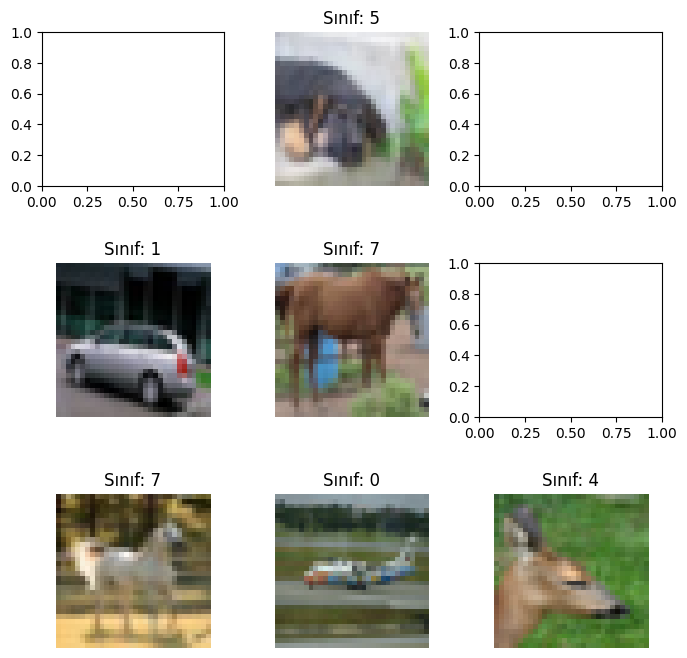

In [4]:
fig,axes=plt.subplots(3,3, figsize=(8,8))
axes=axes.ravel()
for i in range(9):
    # Rastgele bir resim seç
    random_index = np.random.randint(0, len(X_train))
    img = X_train[random_index]
    label = y_train[random_index]
    # Resmi göster
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(class_names[label])
plt.tight_layout()
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()

2. Derin öğrenme modelinin oluşturulması:

* 2.1 CNN modelinin oluşturulması

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2.2. Modelin Derlenmesi

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

2.3. Modelin eğitilmesi


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - accuracy: 0.3430 - loss: 1.7757 - val_accuracy: 0.5124 - val_loss: 1.3580
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.5470 - loss: 1.2608 - val_accuracy: 0.6003 - val_loss: 1.1315
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.6153 - loss: 1.0971 - val_accuracy: 0.6216 - val_loss: 1.0730
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.6525 - loss: 0.9806 - val_accuracy: 0.6360 - val_loss: 1.0316
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.6827 - loss: 0.8974 - val_accuracy: 0.6590 - val_loss: 0.9810
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.7090 - loss: 0.8285 - val_accuracy: 0.6810 - val_loss: 0.9206
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.7282 - loss: 0.7673 - val_accuracy: 0.6819 - val_loss: 0.9187
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 29s 23ms/step - accuracy: 0.7496 -

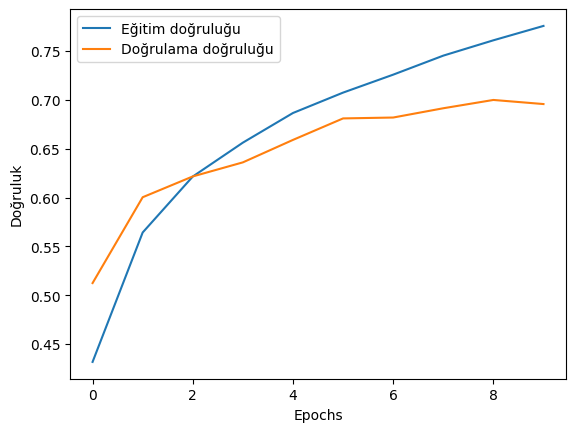

In [7]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Eğitim sürecinin görselleştirilmesi
plt.plot(history.history['accuracy'], label='Eğitim doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

Modelin Test Edilmesi ve Değerlendirilmesi
* Test görüntülerinin yüklenmesi ve ön işlenmesi

In [12]:
test_images = []
test_images.append(
    load_img('/kaggle/input/samples/kamyon.jpg', target_size=(32, 32)))
test_images.append(
    load_img('/kaggle/input/samples/uak.jpg', target_size=(32, 32)))
test_images = np.array([img_to_array(img) for img in test_images])
test_images = test_images / 255.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Tahmin edilen sınıf: kamyon
Tahmin edilen sınıf: uçak


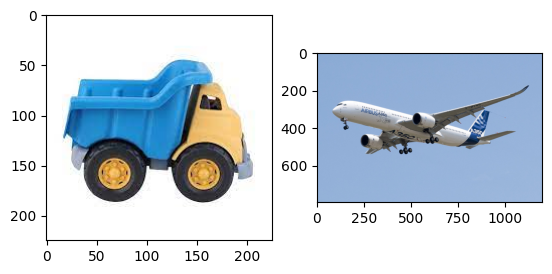

In [14]:
# Tahminlerin yapılması
results = model.predict(test_images)

# Tahmin sonuçlarının yazdırılması
for result in results:
    print('Tahmin edilen sınıf:', class_names[np.argmax(result)])
    
# Görüntülerin gösterilmesi
fig, ax = plt.subplots(1, 2)
ax[0].imshow(load_img('/kaggle/input/samples/kamyon.jpg'))
ax[1].imshow(load_img('/kaggle/input/samples/uak.jpg'))

modelin performansının değerlendirilmesi

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from itertools import product
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Tahminlerin yapılması

In [17]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test.ravel()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


Hata Matrisi

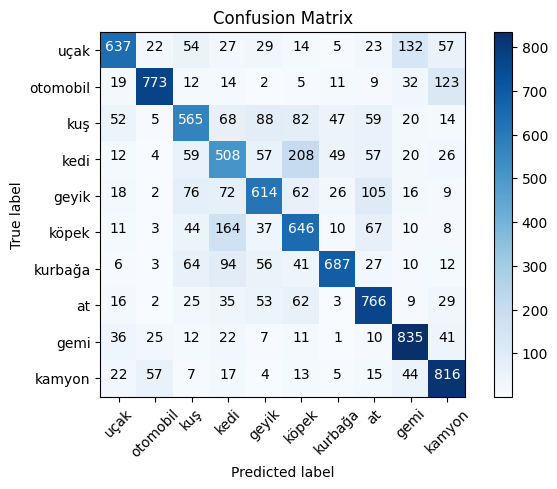

In [18]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
plot_confusion_matrix(cm, classes=class_names)
plt.show()